# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [9]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for preprocessing in ['pca', 'lda']:
        for init in ['uniform', 'normal', 'beta']:
            r = pd.read_csv("../reports/results/covtype_ibm_perth_{}_{}_{}_results.csv".format(optimizer, preprocessing, init), index_col=0)
            r['initialization'] = init

            res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1         time   
index                                    
0         0.316  0.335912  9694.741309  \
1         0.372  0.380078  8504.537205   
2         0.288  0.347548  7179.343949   
3         0.324  0.346356  6455.553307   
4         0.228  0.283792  9844.196774   

                                              ansatz   
index                                                  
0      <function get_efficientsu2 at 0x7f0816bd7ee0>  \
1      <function get_efficientsu2 at 0x7f0816bd7ee0>   
2      <function get_efficientsu2 at 0x7f0816bd7ee0>   
3      <function get_efficientsu2 at 0x7f0816bd7ee0>   
4      <function get_efficientsu2 at 0x7f0816bd7ee0>   

                                     optimizer   
index                                            
0      <function get_cobyla at 0x7f0816bd7f70>  \
1      <function get_cobyla at 0x7f0816bd7f70>   
2      <function get_cobyla at 0x7f0816bd7f70>   
3      <function get_cobyla at 0x7f0816bd7f70>   
4      <function get_cobyla at 0x7f0816bd7f70>   

                                          featuremap entanglement   
index                                                               
0       <function get_zfeaturemap at 0x7f0846bfb550>         full  \
1       <function get_zfeaturemap at 0x7f0846bfb550>       linear   
2       <function get_zfeaturemap at 0x7f0846bfb550>     circular   
3       <function get_zfeaturemap at 0x7f0846bfb550>          sca   
4      <function get_zzfeaturemap at 0x7f0846c059d0>         full   

      entanglement_featuremap  iterations preprocessing initialization  
index                                                                   
0                         NaN         250           pca        uniform  
1                         NaN         250           pca        uniform  
2                         NaN         210           pca        uniform  
3                         NaN         188           pca        uniform  
4                        full         168           pca        uniform

In [10]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [11]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [12]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [13]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

In [14]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1         time            ansatz optimizer featuremap   
0     0.608  0.600225  1867.412828         two_local      spsa         zz  \
1     0.616  0.593082  2031.019653   real_amplitudes    cobyla          z   
2     0.588  0.592505  2493.108361   real_amplitudes    cobyla         zz   
3     0.596  0.592446  3190.705036  pauli_two_design    cobyla         zz   
4     0.596  0.588833  1922.349585         two_local    cobyla         zz   

  entanglement entanglement_featuremap  iterations preprocessing   
0       linear                pairwise         201           lda  \
1       linear                     NaN         169           lda   
2     circular                circular         168           lda   
3          NaN                  linear         189           lda   
4         full                  linear         119           lda   

  initialization  
0           beta  
1           beta  
2           beta  
3           beta  
4           beta

In [15]:
res.tail()

accuracy        f1          time           ansatz    optimizer   
1507     0.020  0.012531  13434.391199  real_amplitudes  nelder_mead  \
1508     0.024  0.011048   4695.876112        two_local  nelder_mead   
1509     0.016  0.008547  13309.114736  real_amplitudes  nelder_mead   
1510     0.032  0.006507   5822.474887    efficient_su2  nelder_mead   
1511     0.028  0.002333   5669.558971    efficient_su2  nelder_mead   

     featuremap entanglement entanglement_featuremap  iterations   
1507          z         full                     NaN         380  \
1508          z     circular                     NaN         392   
1509          z          sca                     NaN         434   
1510          z       linear                     NaN         439   
1511          z     circular                     NaN         424   

     preprocessing initialization  
1507           pca           beta  
1508           lda           beta  
1509           pca           beta  
1510           lda           beta  
1511           lda           beta

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* SPSA is significantly better than COBYLA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [16]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.306865  0.133255  0.336183  0.107464
nelder_mead  0.184421  0.051220  0.227104  0.056376
spsa         0.312349  0.123042  0.339698  0.097437

In [17]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [18]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: SPSA significantly better than COBYLA:", wilcoxon(s['accuracy'], c['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: SPSA significantly better than COBYLA: True
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [19]:
best_configs.value_counts(['optimizer'])

optimizer
cobyla       58
spsa         38
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: slightly worse performance in mean, but not significant
* Although best Pauli ocnfig is in place 3, a lot less are within the best configurations
* The ansatzes do not perform significantly different

In [20]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1         time            ansatz optimizer featuremap   
0    0.608  0.600225  1867.412828         two_local      spsa         zz  \
1    0.616  0.593082  2031.019653   real_amplitudes    cobyla          z   
3    0.596  0.592446  3190.705036  pauli_two_design    cobyla         zz   

  entanglement entanglement_featuremap iterations preprocessing initialization  
0       linear                pairwise        201           lda           beta  
1       linear                     NaN        169           lda           beta  
3          NaN                  linear        189           lda           beta

In [21]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                f1          
                      mean       std   amin   amax      mean       std
ansatz                                                                
efficient_su2     0.263417  0.123378  0.028  0.608  0.297064  0.103197
pauli_two_design  0.262148  0.115743  0.052  0.596  0.298809  0.102491
real_amplitudes   0.267194  0.126200  0.016  0.616  0.299167  0.106702
two_local         0.273141  0.123748  0.024  0.608  0.306040  0.102568

In [22]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [23]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [24]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz          
efficient_su2       25
pauli_two_design     5
real_amplitudes     26
two_local           40
Name: count, dtype: int64

## Ansatz Entanglement
* Hardly any big difference in mean
* Significance test shows no significant difference

In [25]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                  mean median       std      mean    median       std
entanglement                                                         
circular      0.266000  0.220  0.125107  0.299079  0.273322  0.105993
full          0.273630  0.228  0.118667  0.304485  0.275393  0.098118
linear        0.263358  0.216  0.129602  0.296840  0.268235  0.109287
pairwise      0.281704  0.240  0.123375  0.312934  0.290198  0.097934
sca           0.265827  0.214  0.124472  0.300325  0.267603  0.104699

In [26]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [27]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

Entanglement significantly different: False


In [28]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular        18
full            15
linear          22
pairwise        12
sca             24
NaN              5
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [29]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                  mean median       std      mean    median   
ansatz          entanglement                                                  
efficient_su2   circular      0.265333  0.216  0.125130  0.299036  0.266755  \
                full          0.268704  0.220  0.115374  0.302491  0.272446   
                linear        0.256741  0.212  0.128486  0.289481  0.268235   
                sca           0.262889  0.208  0.125542  0.297248  0.266181   
real_amplitudes circular      0.265778  0.220  0.130724  0.298970  0.270363   
                full          0.272296  0.222  0.119291  0.300877  0.270013   
                linear        0.266074  0.222  0.131513  0.299056  0.270476   
                sca           0.264630  0.214  0.124504  0.297764  0.268832   
two_local       circular      0.266889  0.226  0.120417  0.299232  0.277943   
                full          0.279889  0.236  0.122072  0.310086  0.286560   
                linear        0.267259  0.212  0.129740  0.301985  0.267704   
                pairwise      0.281704  0.240  0.123375  0.312934  0.290198   
                sca           0.269963  0.220  0.124419  0.305963  0.270248   

                                        
                                   std  
ansatz          entanglement            
efficient_su2   circular      0.107314  
                full          0.094940  
                linear        0.106723  
                sca           0.104335  
real_amplitudes circular      0.110010  
                full          0.098449  
                linear        0.113271  
                sca           0.105975  
two_local       circular      0.101463  
                full          0.101521  
                linear        0.108387  
                pairwise      0.097934  
                sca           0.104527

In [30]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05)
    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: False
real_amplitudes significantly different entanglement: False
two_local significantly different entanglement: False


In [31]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz            entanglement
efficient_su2     circular         6
                  full             5
                  linear           6
                  sca              8
pauli_two_design  NaN              5
real_amplitudes   circular         8
                  full             3
                  linear           8
                  sca              7
two_local         circular         4
                  full             7
                  linear           8
                  pairwise        12
                  sca              9
Name: count, dtype: int64

## Feature Map
* ZFeatureMap is significantly better than ZZFeatureMap, but best configs almost all use ZZ because ZZ with beta is so much better
* But, ZZFeatureMap performs very good with beta initialization

In [32]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                mean median       std      mean    median       std
featuremap                                                         
z           0.361698  0.408  0.158348  0.347513  0.361669  0.135267
zz          0.249114  0.216  0.106143  0.291691  0.267085  0.093756

In [33]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                               mean median       std      mean    median   
featuremap initialization                                                  
z          beta            0.397571  0.484  0.174667  0.324210  0.340973  \
           normal          0.342571  0.376  0.146627  0.358232  0.384018   
           uniform         0.344952  0.370  0.147858  0.360096  0.380791   
zz         beta            0.337000  0.318  0.141158  0.363016  0.354677   
           normal          0.204714  0.204  0.033503  0.255580  0.251683   
           uniform         0.205629  0.200  0.034509  0.256478  0.253596   

                                     
                                std  
featuremap initialization            
z          beta            0.144311  
           normal          0.128987  
           uniform         0.130548  
zz         beta            0.126130  
           normal          0.037129  
           uniform         0.038417

In [34]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [35]:
print("Z significantly better than ZZFeatureMap:", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

Z significantly better than ZZFeatureMap: True


In [36]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z             31
zz            65
Name: count, dtype: int64

## Feature Entanglement
* linear outperforms all but pairwise significantly, pairwise outperforms full
* Notably, full is a lot less represented among the best ones

In [37]:
res.groupby(['entanglement_featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                             mean median       std      mean    median   
entanglement_featuremap                                                  
circular                 0.244206  0.208  0.108382  0.287764  0.257848  \
full                     0.238492  0.220  0.078064  0.282819  0.268020   
linear                   0.259063  0.216  0.118281  0.299367  0.270362   
pairwise                 0.257825  0.220  0.117117  0.298962  0.273675   
sca                      0.245984  0.210  0.103155  0.289545  0.262783   

                                   
                              std  
entanglement_featuremap            
circular                 0.097044  
full                     0.071282  
linear                   0.102553  
pairwise                 0.101722  
sca                      0.092284

In [38]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s).pvalue < 0.05)

Entanglement significantly different: False


In [39]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
circular                   13
full                        1
linear                     20
pairwise                   21
sca                        10
NaN                        31
Name: count, dtype: int64

## Ansatz and feature map
* Results do not differ too much - ZFeatureMap is significantly better than ZZFeatureMap for all ansatzes

In [40]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                 mean median       std      mean    median   
ansatz           featuremap                                                  
efficient_su2    z           0.349333  0.382  0.159192  0.335575  0.349102  \
                 zz          0.246233  0.208  0.107175  0.289362  0.265417   
pauli_two_design z           0.342889  0.318  0.124593  0.345624  0.341918   
                 zz          0.246000  0.218  0.107511  0.289446  0.267066   
real_amplitudes  z           0.363500  0.426  0.166859  0.347610  0.369142   
                 zz          0.247933  0.212  0.106687  0.289478  0.265062   
two_local        z           0.373911  0.410  0.158030  0.357362  0.361669   
                 zz          0.252987  0.220  0.104835  0.295775  0.270978   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.133872  
                 zz          0.094256  
pauli_two_design z           0.101936  
                 zz          0.100559  
real_amplitudes  z           0.145879  
                 zz          0.094314  
two_local        z           0.134645  
                 zz          0.091661

In [41]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z significantly better than ZZ", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

efficient_su2: Z significantly better than ZZ True
pauli_two_design: Z significantly better than ZZ True
real_amplitudes: Z significantly better than ZZ True
two_local: Z significantly better than ZZ True


In [42]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz            featuremap
efficient_su2     z              5
                  zz            20
pauli_two_design  zz             5
real_amplitudes   z              9
                  zz            17
two_local         z             17
                  zz            23
Name: count, dtype: int64

## Preprocessing
* LDA significantly better than PCA

In [43]:
res.groupby(['preprocessing']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                   mean       std      mean       std
preprocessing                                        
lda            0.284249  0.151648  0.310416  0.130613
pca            0.251508  0.084350  0.291574  0.066107

In [44]:
p = res[res['preprocessing']=='pca'].set_index(index).sort_index()['accuracy']
l = res[res['preprocessing']=='lda'].set_index(index).sort_index()['accuracy']

In [45]:
print("LDA significantly better than PCA: ", wilcoxon(l, p, alternative='greater').pvalue < 0.05)

LDA significantly better than PCA:  True


In [46]:
best_configs.value_counts(['preprocessing'], dropna=False)

preprocessing
lda              95
pca               1
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [47]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.347095  0.148805  0.356549  0.129992
normal          0.227690  0.084424  0.272689  0.073213
uniform         0.228849  0.085445  0.273748  0.074403

In [48]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [49]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Normal and Uniform significantly different: False


In [50]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              76
uniform           12
normal             8
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [51]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.425310  0.115537  0.425646  0.096685
            normal          0.251738  0.096870  0.295736  0.081445
            uniform         0.243548  0.097711  0.287166  0.081782
nelder_mead beta            0.188476  0.076825  0.219533  0.082526
            normal          0.182024  0.031859  0.230549  0.035937
            uniform         0.182762  0.030981  0.231231  0.037201
spsa        beta            0.427500  0.097337  0.424468  0.080052
            normal          0.249310  0.088988  0.291781  0.074381
            uniform         0.260238  0.090207  0.302846  0.075829

In [52]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)


spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Normal and Uniform significantly different: True
cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Normal and Uniform significantly different: True
nelder_mead: Significant Differences: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [53]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.341500  0.152321  0.350917  0.133220
                 normal          0.224167  0.081651  0.270095  0.069594
                 uniform         0.224583  0.082468  0.270180  0.071601
pauli_two_design beta            0.348778  0.141236  0.365988  0.127800
                 normal          0.218222  0.073055  0.264117  0.070711
                 uniform         0.219444  0.063958  0.266322  0.061767
real_amplitudes  beta            0.342611  0.155212  0.350740  0.136414
                 normal          0.228056  0.084352  0.272636  0.073943
                 uniform         0.230917  0.090558  0.274124  0.078868
two_local        beta            0.354822  0.142966  0.363813  0.122975
                 normal          0.232111  0.089032  0.276520  0.076241
                 uniform         0.232489  0.087646  0.277787  0.075545

In [54]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False
real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: False
pauli_two_design: Significant Differences: True
pauli_two_design: Beta significantly better than Uniform: True
pauli_two_design: Beta significantly better than Normal: True
pauli_two_design: Normal and Uniform significantly different: False
efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [55]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.339370  0.153344  0.348537  0.136611
             normal          0.226704  0.083404  0.272350  0.070325
             uniform         0.231926  0.092807  0.276350  0.081203
full         beta            0.354259  0.140094  0.359476  0.121085
             normal          0.232000  0.081233  0.275572  0.070841
             uniform         0.234630  0.080234  0.278407  0.069274
linear       beta            0.340963  0.158085  0.352190  0.138582
             normal          0.223111  0.088754  0.268129  0.076498
             uniform         0.226000  0.093346  0.270201  0.079730
pairwise     beta            0.369667  0.136919  0.372631  0.111673
             normal          0.237667  0.087350  0.281157  0.072517
             uniform         0.237778  0.090658  0.285013  0.078009
sca          beta            0.345704  0.151589  0.357484  0.131436
             normal          0.228778  0.087897  0.274737  0.077095
             uniform         0.223000  0.079922  0.268753  0.070051

In [56]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X FeatureMap
Beta significantly better for both feature maps. No significant differences for uniform and normal otherwise.

In [57]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.397571  0.174667  0.324210  0.144311
           normal          0.342571  0.146627  0.358232  0.128987
           uniform         0.344952  0.147858  0.360096  0.130548
zz         beta            0.337000  0.141158  0.363016  0.126130
           normal          0.204714  0.033503  0.255580  0.037129
           uniform         0.205629  0.034509  0.256478  0.038417

In [58]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: False
z: Significant Differences: True
z: Beta significantly better than Uniform: True
z: Beta significantly better than Normal: True
z: Normal and Uniform significantly different: False


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [59]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.331571  0.148548  0.362086  0.132965
                        normal          0.199190  0.026748  0.249537  0.030594
                        uniform         0.201857  0.033921  0.251670  0.038423
full                    beta            0.305524  0.098929  0.338640  0.089290
                        normal          0.203286  0.030502  0.253764  0.037500
                        uniform         0.206667  0.029742  0.256053  0.035410
linear                  beta            0.356857  0.158454  0.375847  0.141485
                        normal          0.209952  0.036394  0.260667  0.037675
                        uniform         0.210381  0.036850  0.261587  0.038571
pairwise                beta            0.353667  0.157952  0.372678  0.141541
                        normal          0.213571  0.037728  0.266454  0.040561
                        uniform         0.206238  0.033698  0.257752  0.036396
sca                     beta            0.337381  0.130251  0.365830  0.117193
                        normal          0.197571  0.032874  0.247478  0.036055
                        uniform         0.203000  0.037911  0.255328  0.043067

In [60]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False

### Initialization X Preprocessing
Significant differences for both preprocessing techniques. Beta outperforms both others for both methods, no significant differences between the others. But Beta peforms a lot better on LDA data than PCA (10\% in mean!).

In [61]:
res.groupby(['preprocessing', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                  mean       std      mean       std
preprocessing initialization                                        
lda           beta            0.393952  0.175495  0.389288  0.162841
              normal          0.230127  0.100276  0.271751  0.088183
              uniform         0.228667  0.100972  0.270207  0.087477
pca           beta            0.300238  0.095744  0.323809  0.072068
              normal          0.225254  0.064931  0.273626  0.054440
              uniform         0.229032  0.066597  0.277289  0.058448

In [62]:
for preprocessing in pd.unique(res['preprocessing']):
    res_pre = res[res['preprocessing'] == preprocessing]
    n = res_pre[res_pre['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_pre[res_pre['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_pre[res_pre['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{preprocessing}: Significant Differences:", sign)
    if sign:
        print(f"{preprocessing}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

lda: Significant Differences: True
lda: Beta significantly better than Uniform: True
lda: Beta significantly better than Normal: True
lda: Normal and Uniform significantly different: False
pca: Significant Differences: True
pca: Beta significantly better than Uniform: True
pca: Beta significantly better than Normal: True
pca: Normal and Uniform significantly different: False


## Plot the Results

In [63]:
res_better = res

### Time X Optimizer and Initialization

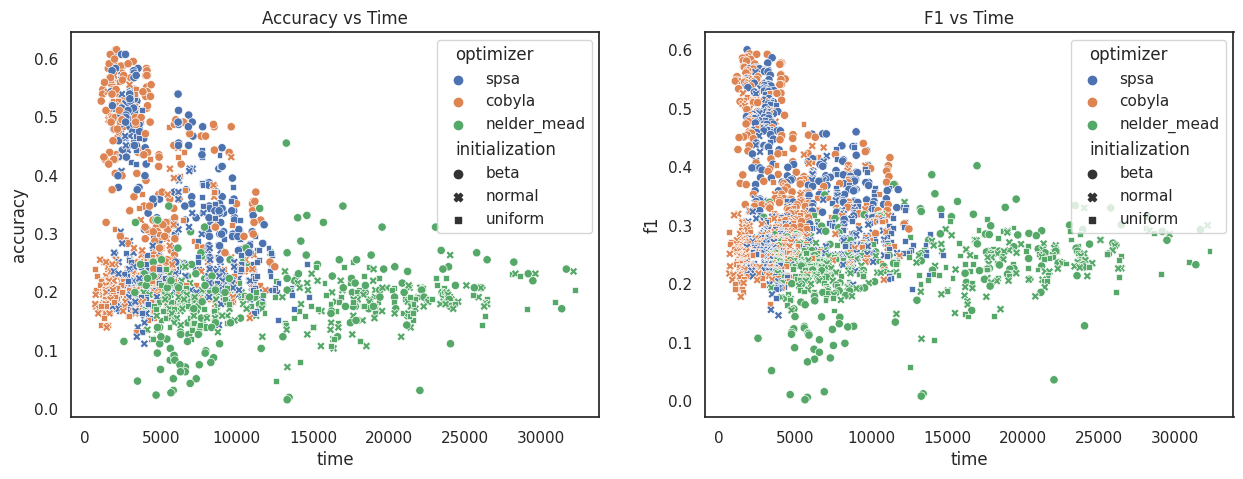

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [65]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", kruskal(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

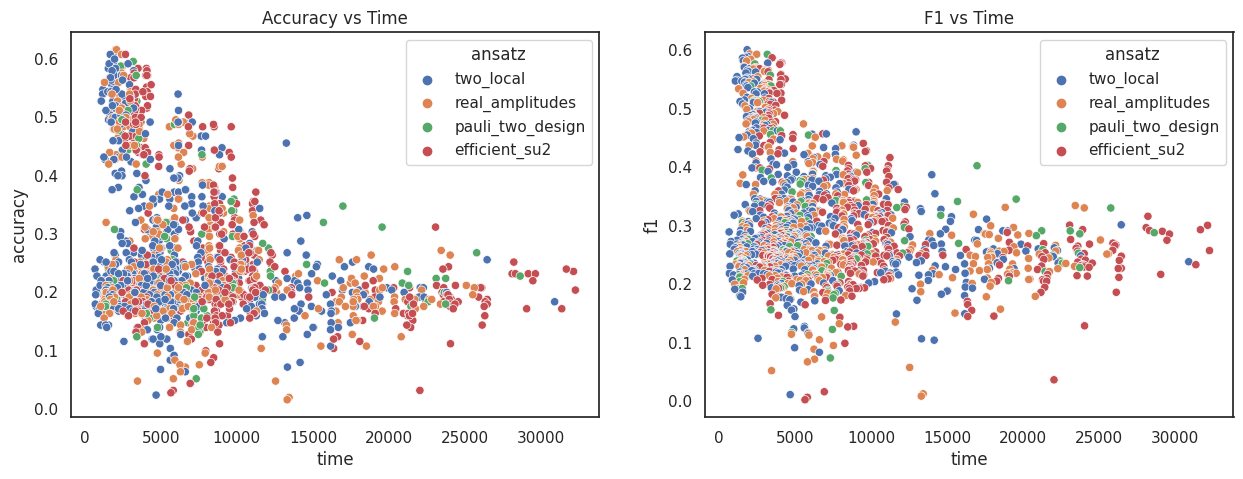

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [67]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


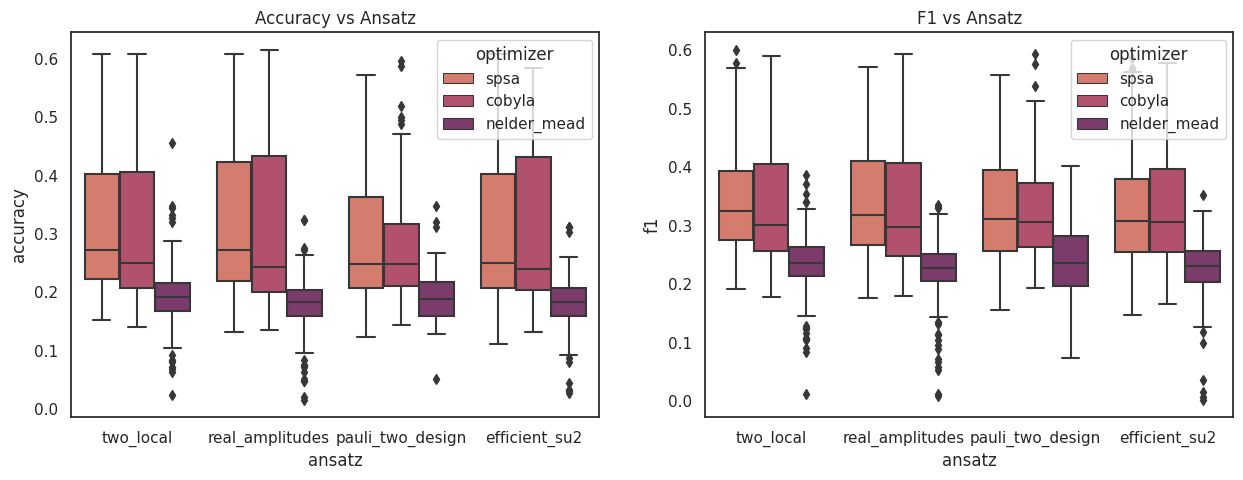

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

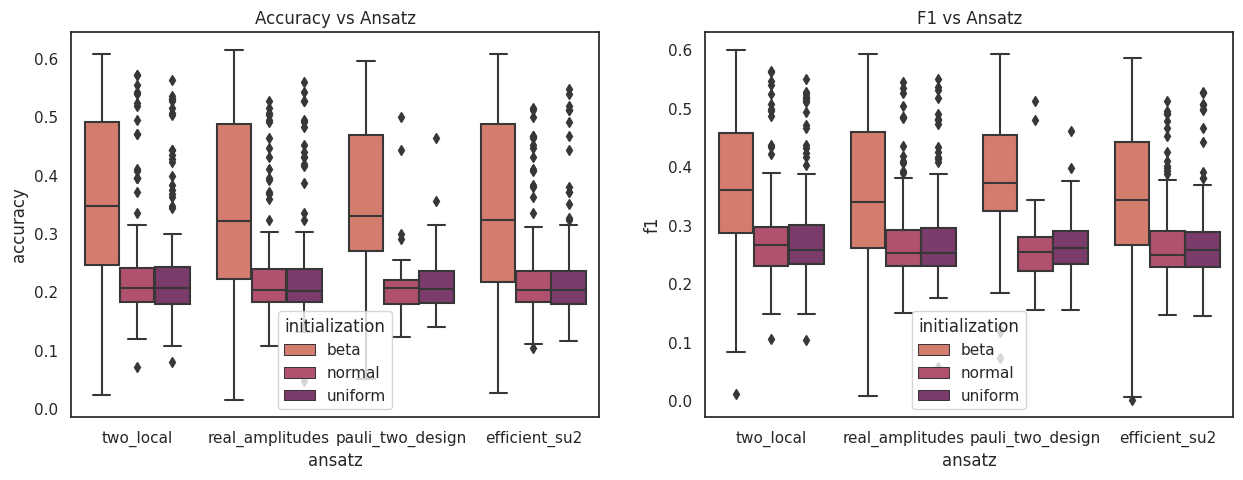

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

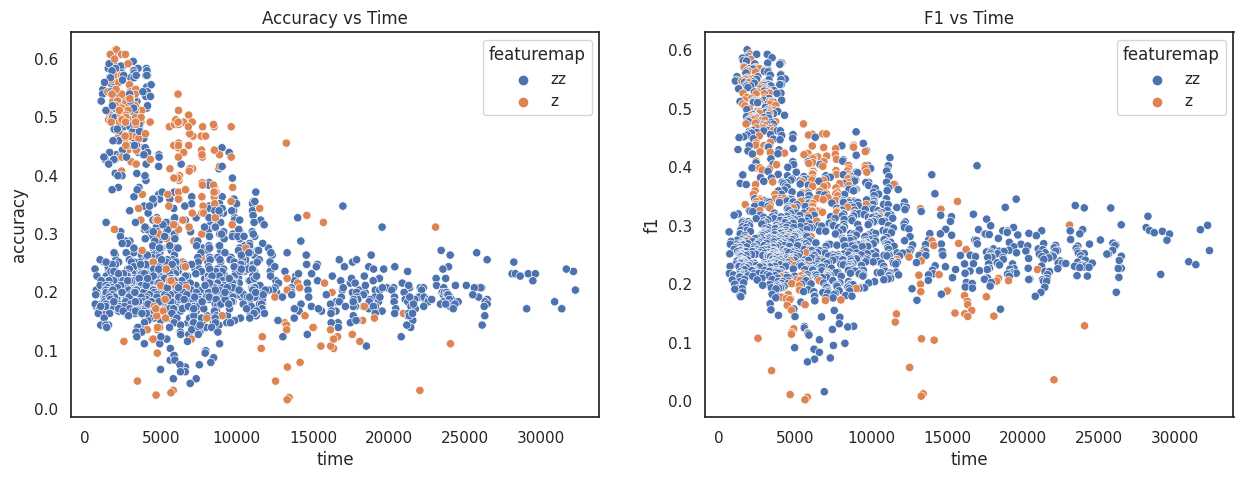

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [71]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z significantly shorter than ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime, alternative='less').pvalue < 0.05)

Z significantly shorter than ZZFeatureMap: True


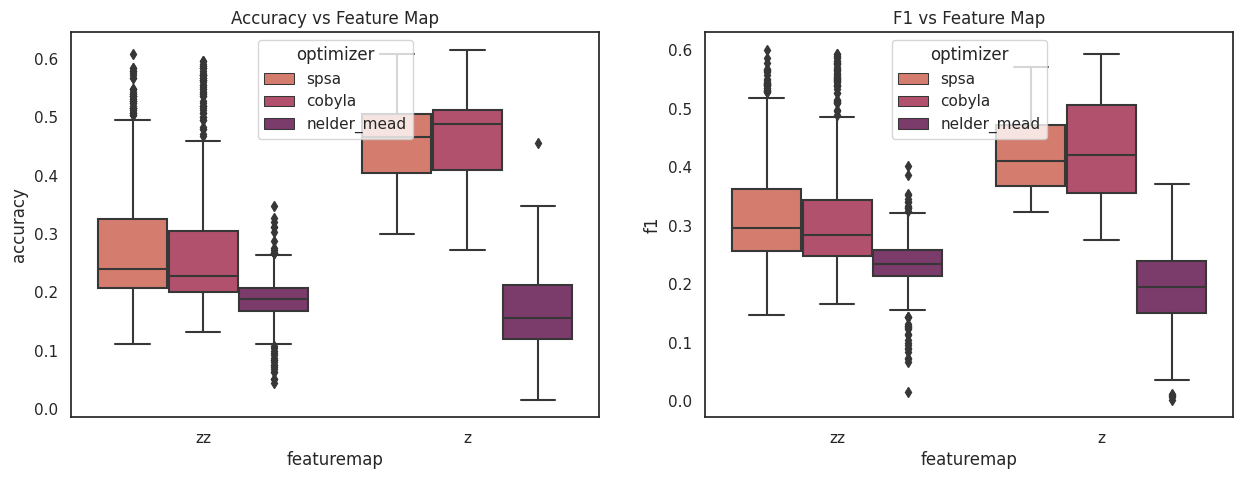

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

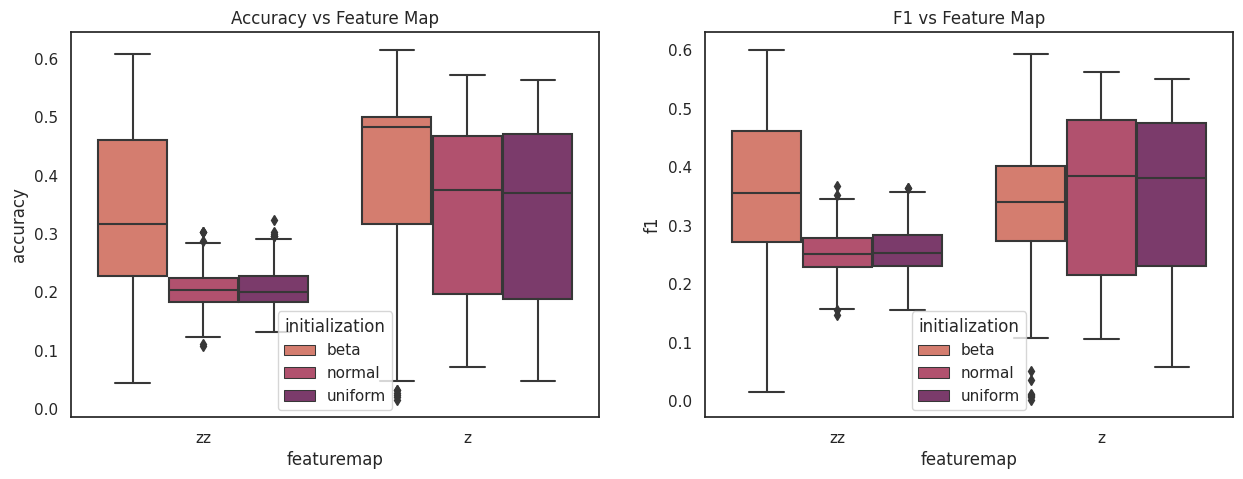

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

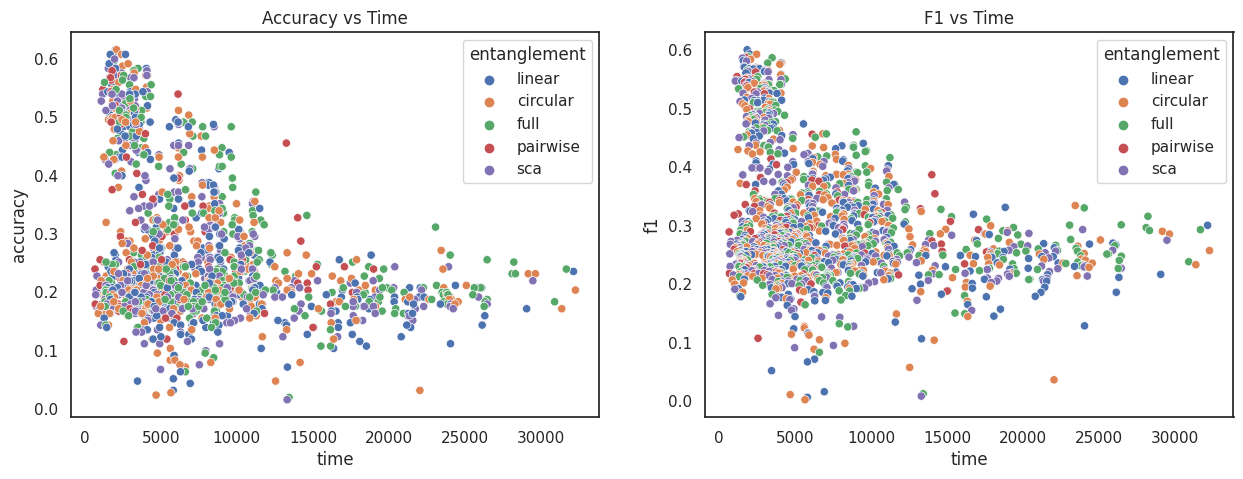

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [75]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


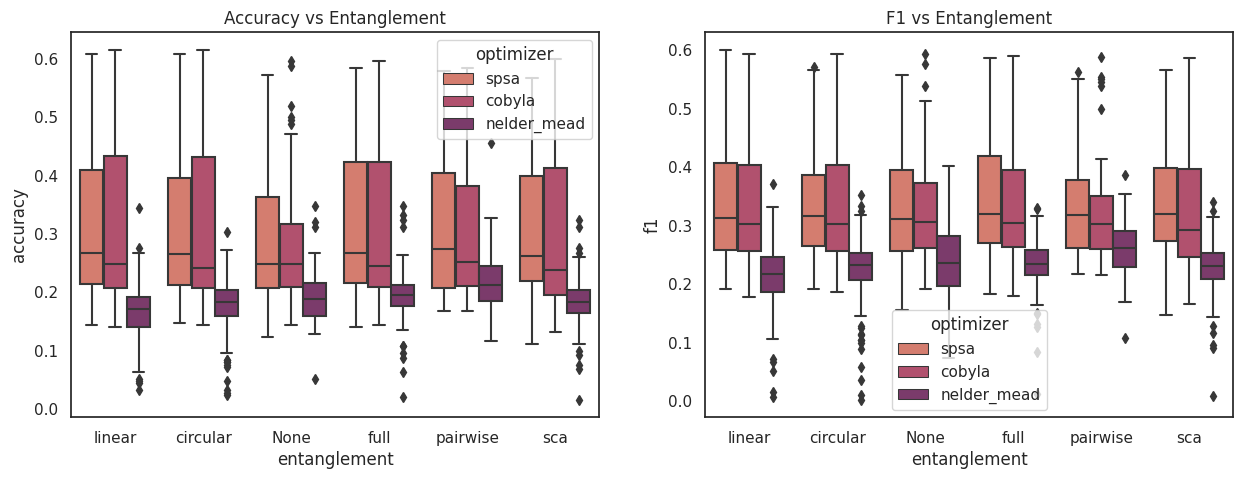

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

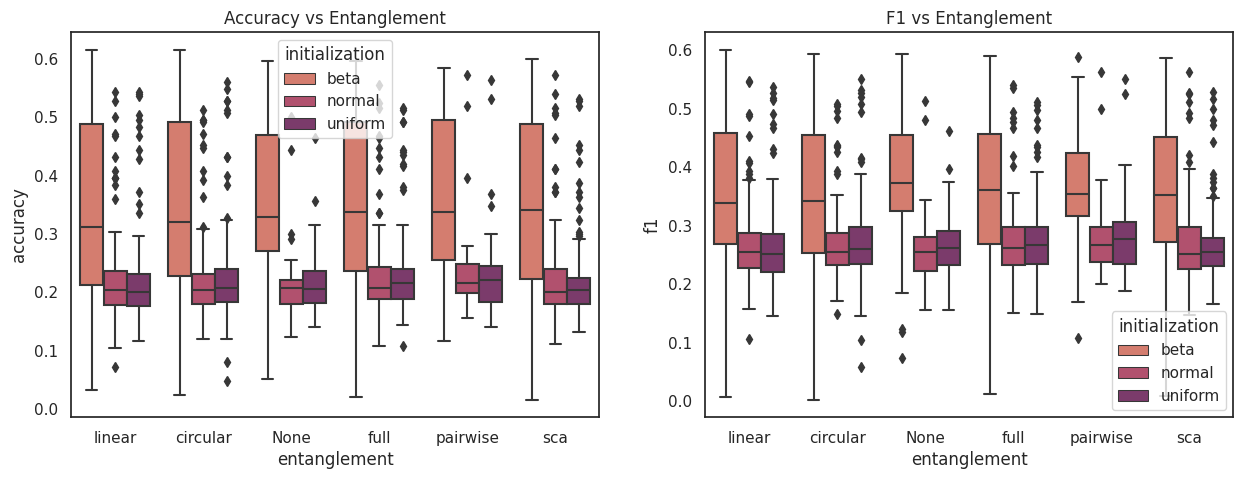

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

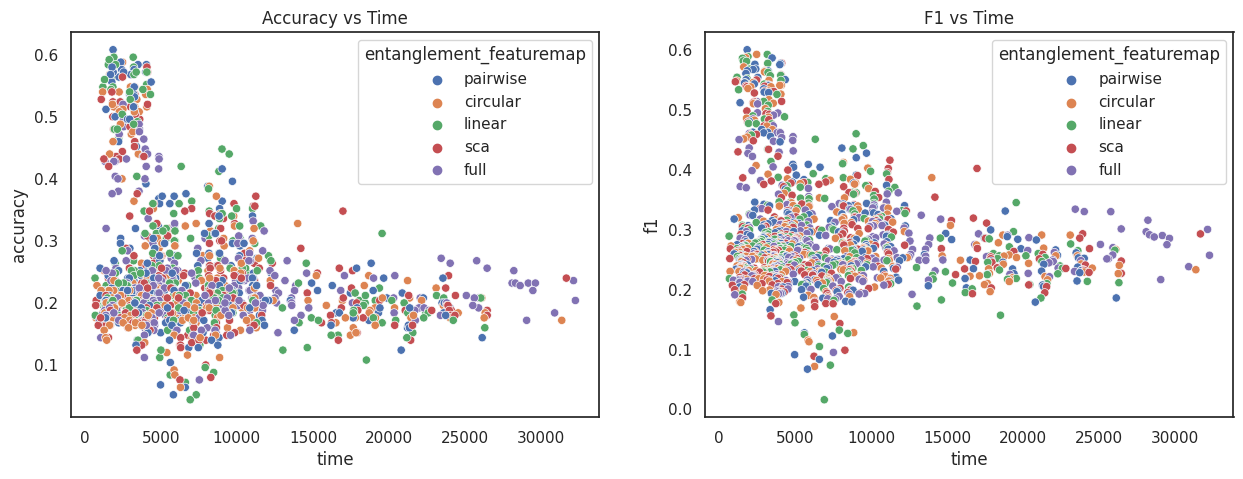

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [79]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than full True


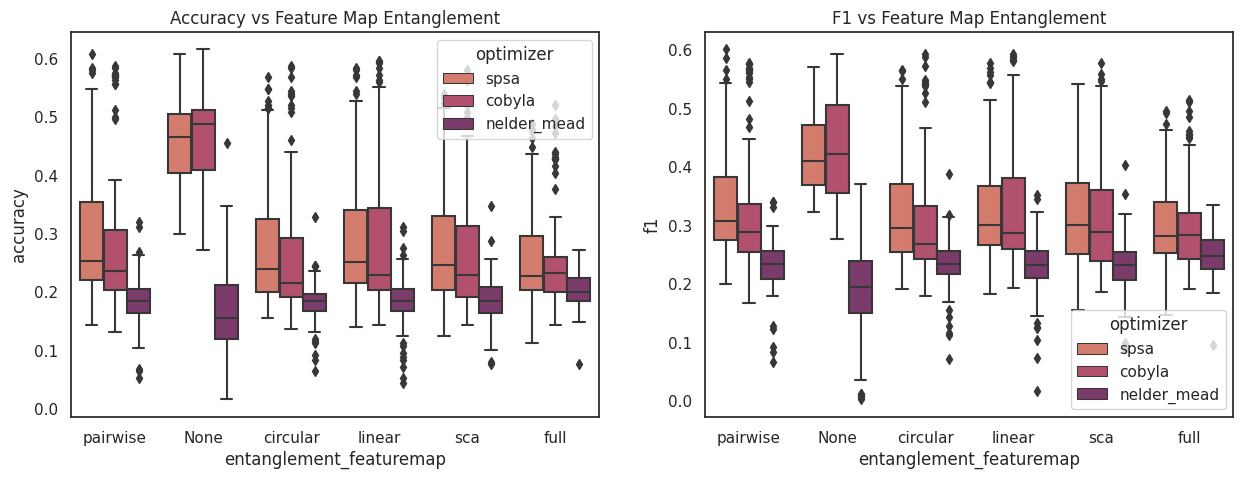

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


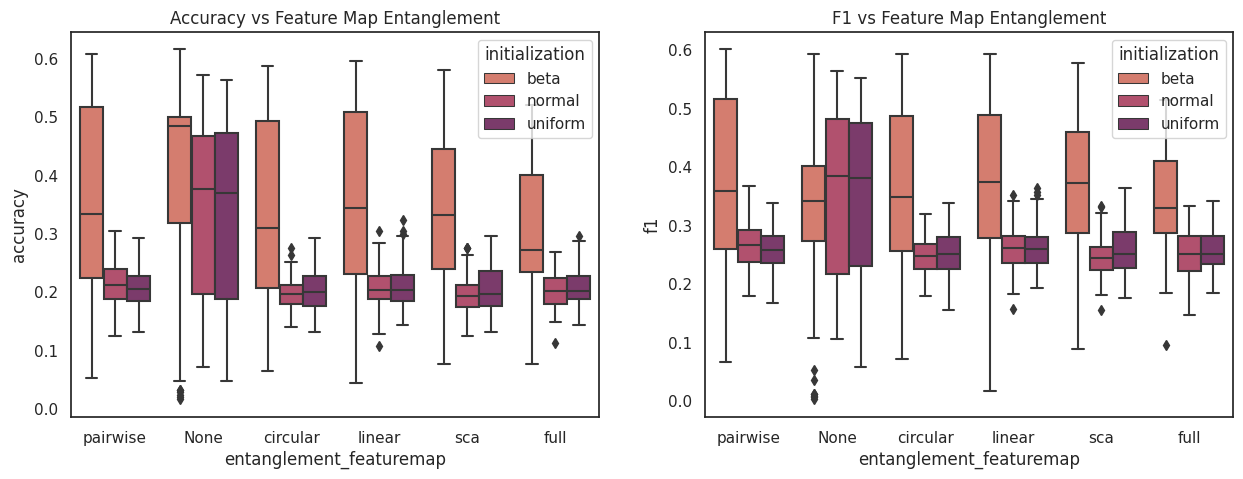

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Preprocessing

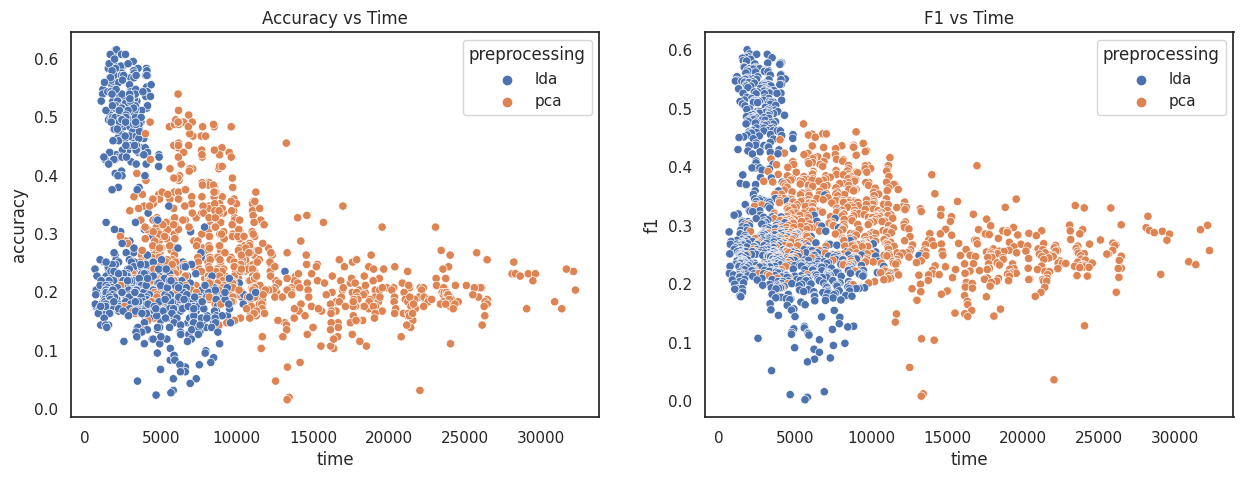

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='preprocessing', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='preprocessing', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [83]:
pca_runtime = res[res['preprocessing']=='pca'].set_index(index).sort_index()['time']
lda_runtime = res[res['preprocessing']=='lda'].set_index(index).sort_index()['time']

# significant differences in runtime
print("PCA significantly longer than LDA:", wilcoxon(pca_runtime, lda_runtime, alternative='greater').pvalue < 0.05)

PCA significantly longer than LDA: True


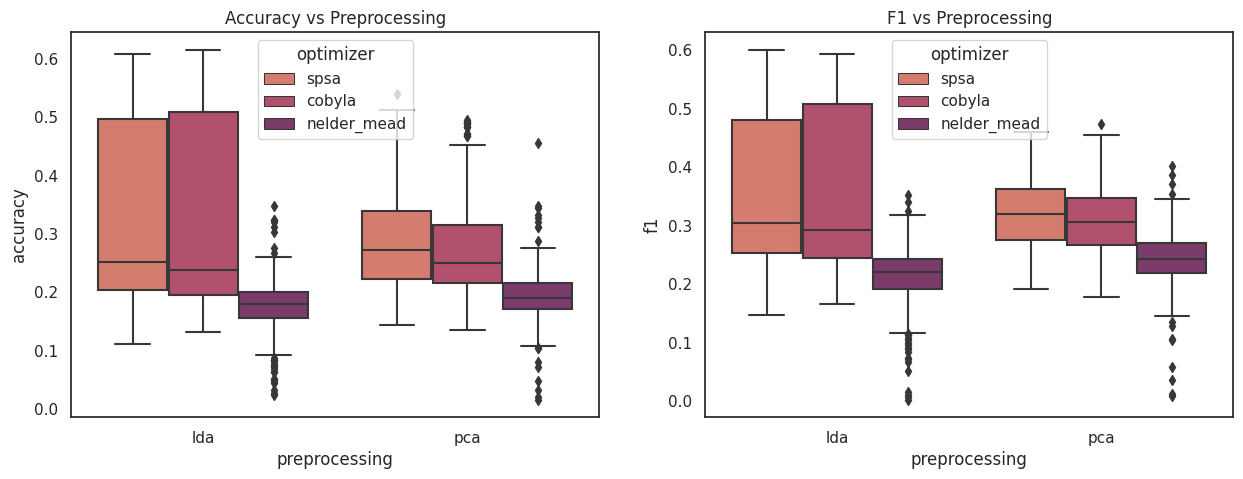

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

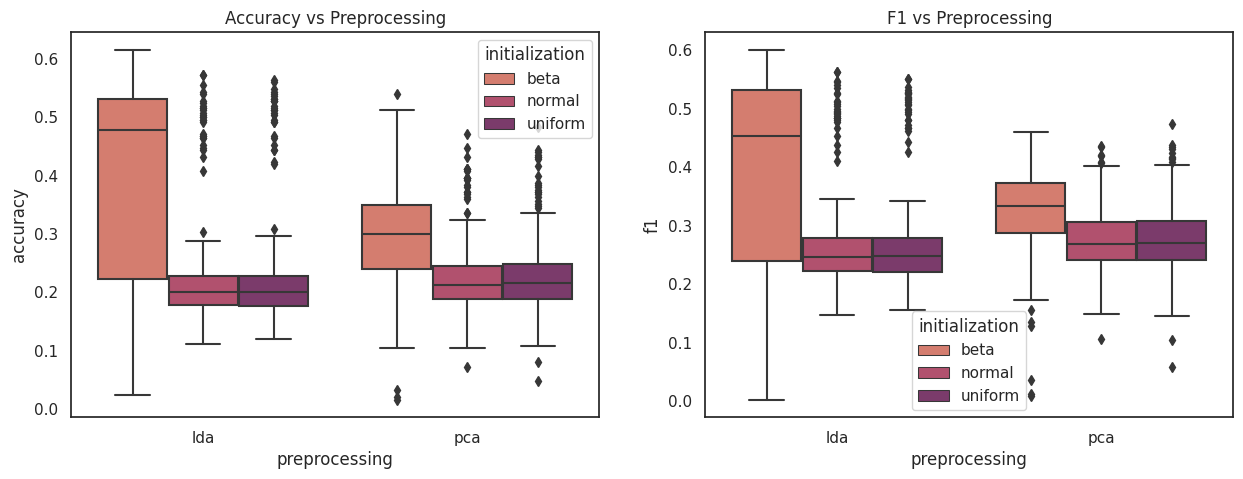

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

### Initialization

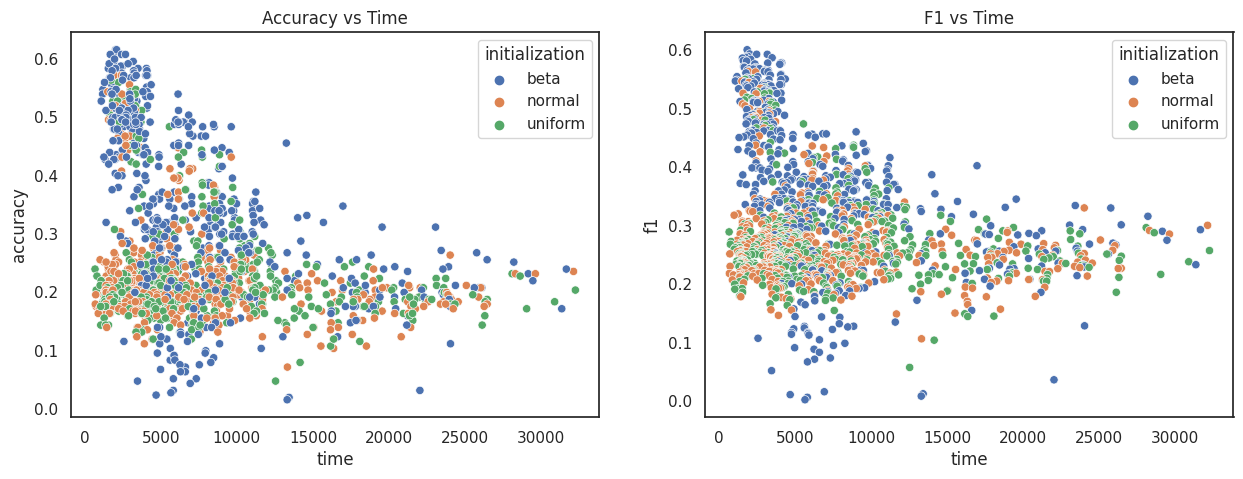

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [87]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(beta, normal, uniform).pvalue < 0.05)

print("Uniform significantly longer than beta:", wilcoxon(uniform, beta, alternative='greater').pvalue < 0.05)
print("Uniform significantly longer than normal:", wilcoxon(uniform, normal, alternative='greater').pvalue < 0.05)
print("Normal significantly shorter than beta:", wilcoxon(normal, beta, alternative='less').pvalue < 0.05)

Significant Differences: True
Uniform significantly longer than beta: True
Uniform significantly longer than normal: True
Normal significantly shorter than beta: True


In [88]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations          time
optimizer   initialization                          
cobyla      beta            163.553571   4519.423733
            normal          141.529762   4006.089229
            uniform         140.517857   3992.678220
nelder_mead beta            444.095238  12505.029617
            normal          457.190476  12713.982971
            uniform         455.059524  12743.750362
spsa        beta            201.000000   5516.573489
            normal          201.000000   5515.825280
            uniform         251.000000   6903.968096

## Plot multiple variables

In [89]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

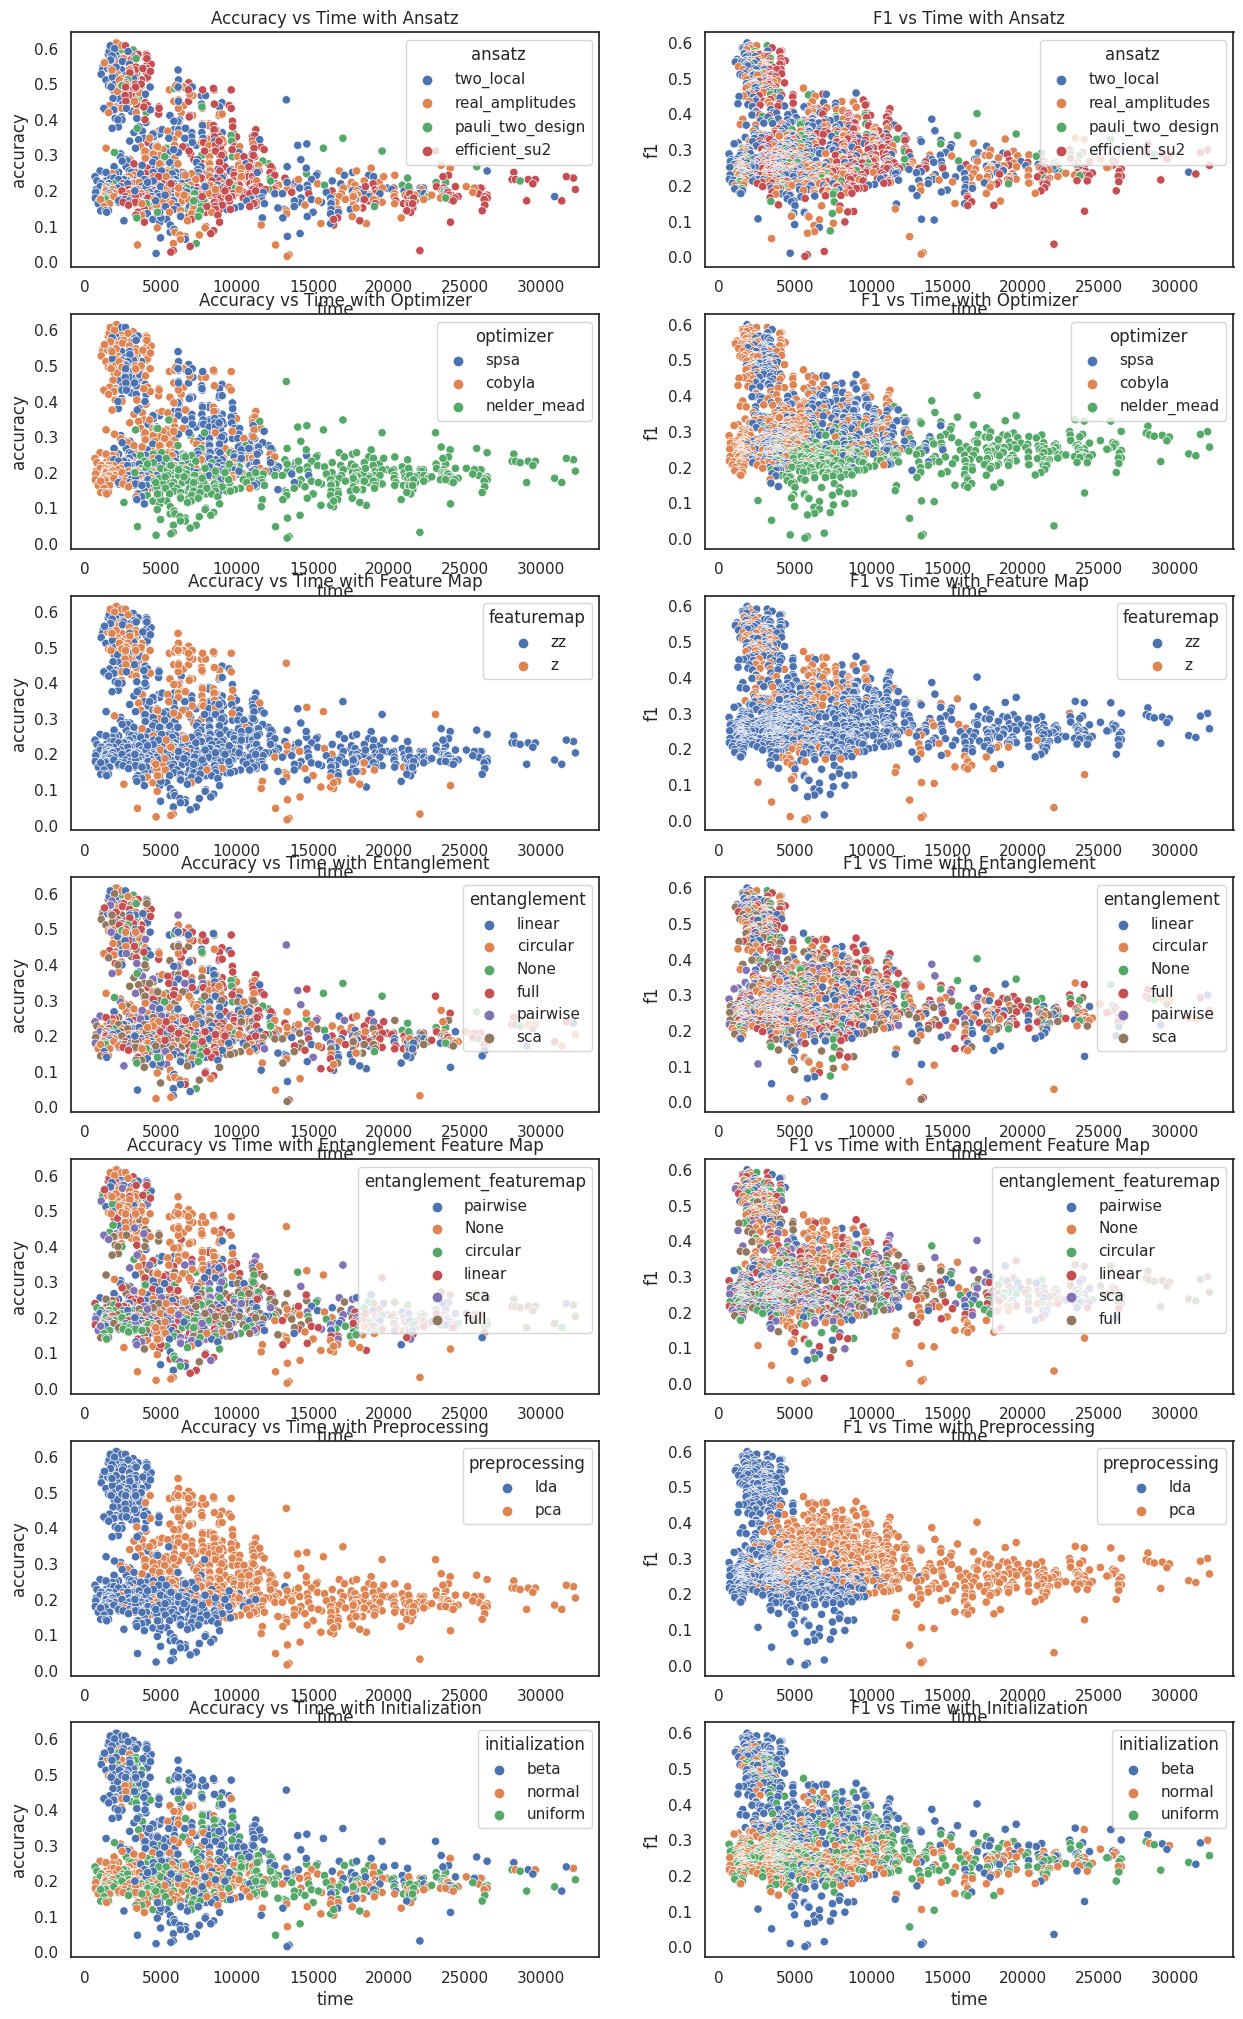

In [90]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

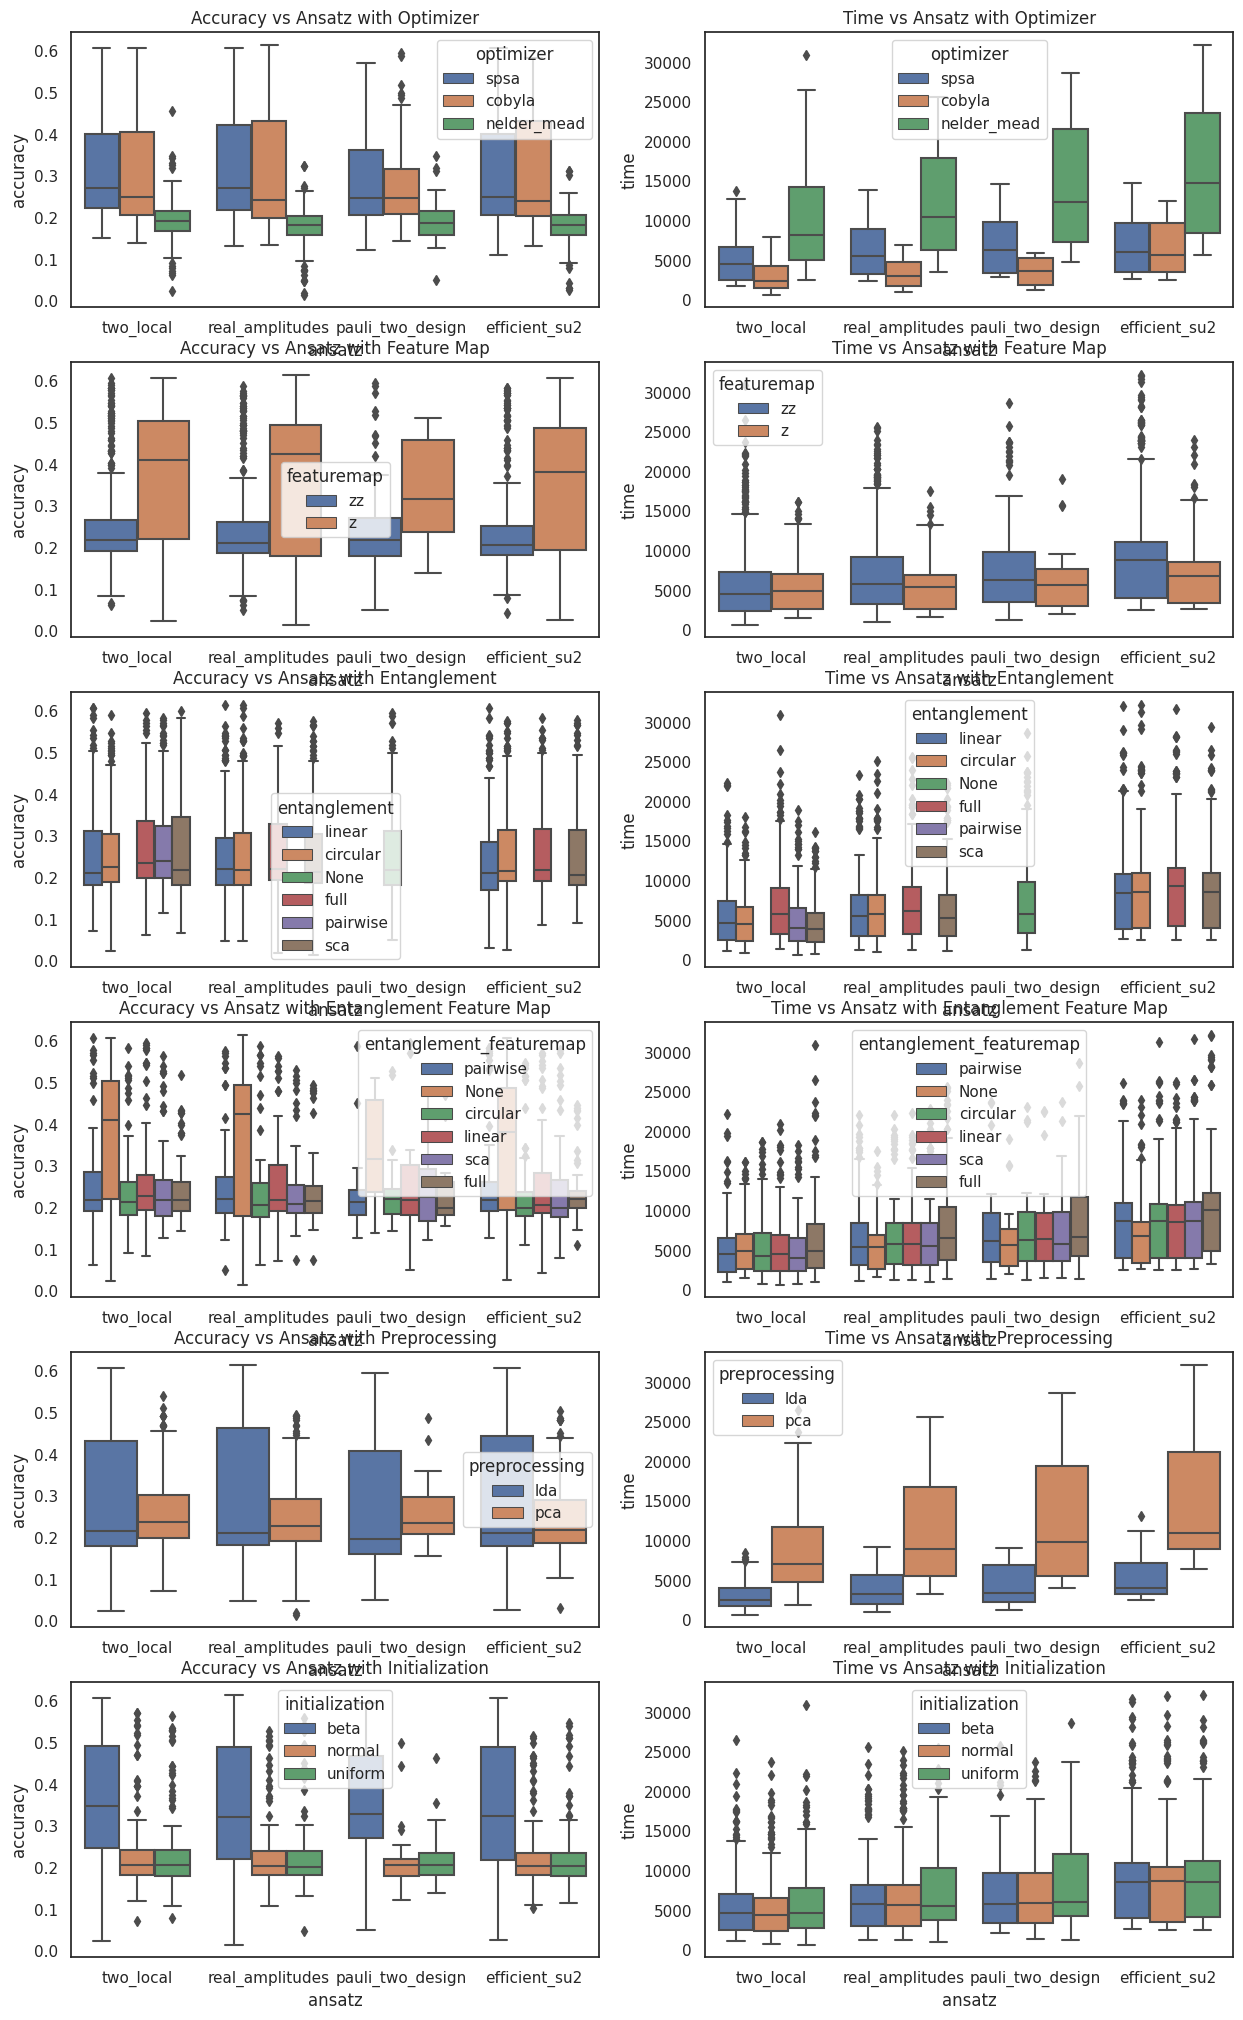

In [91]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

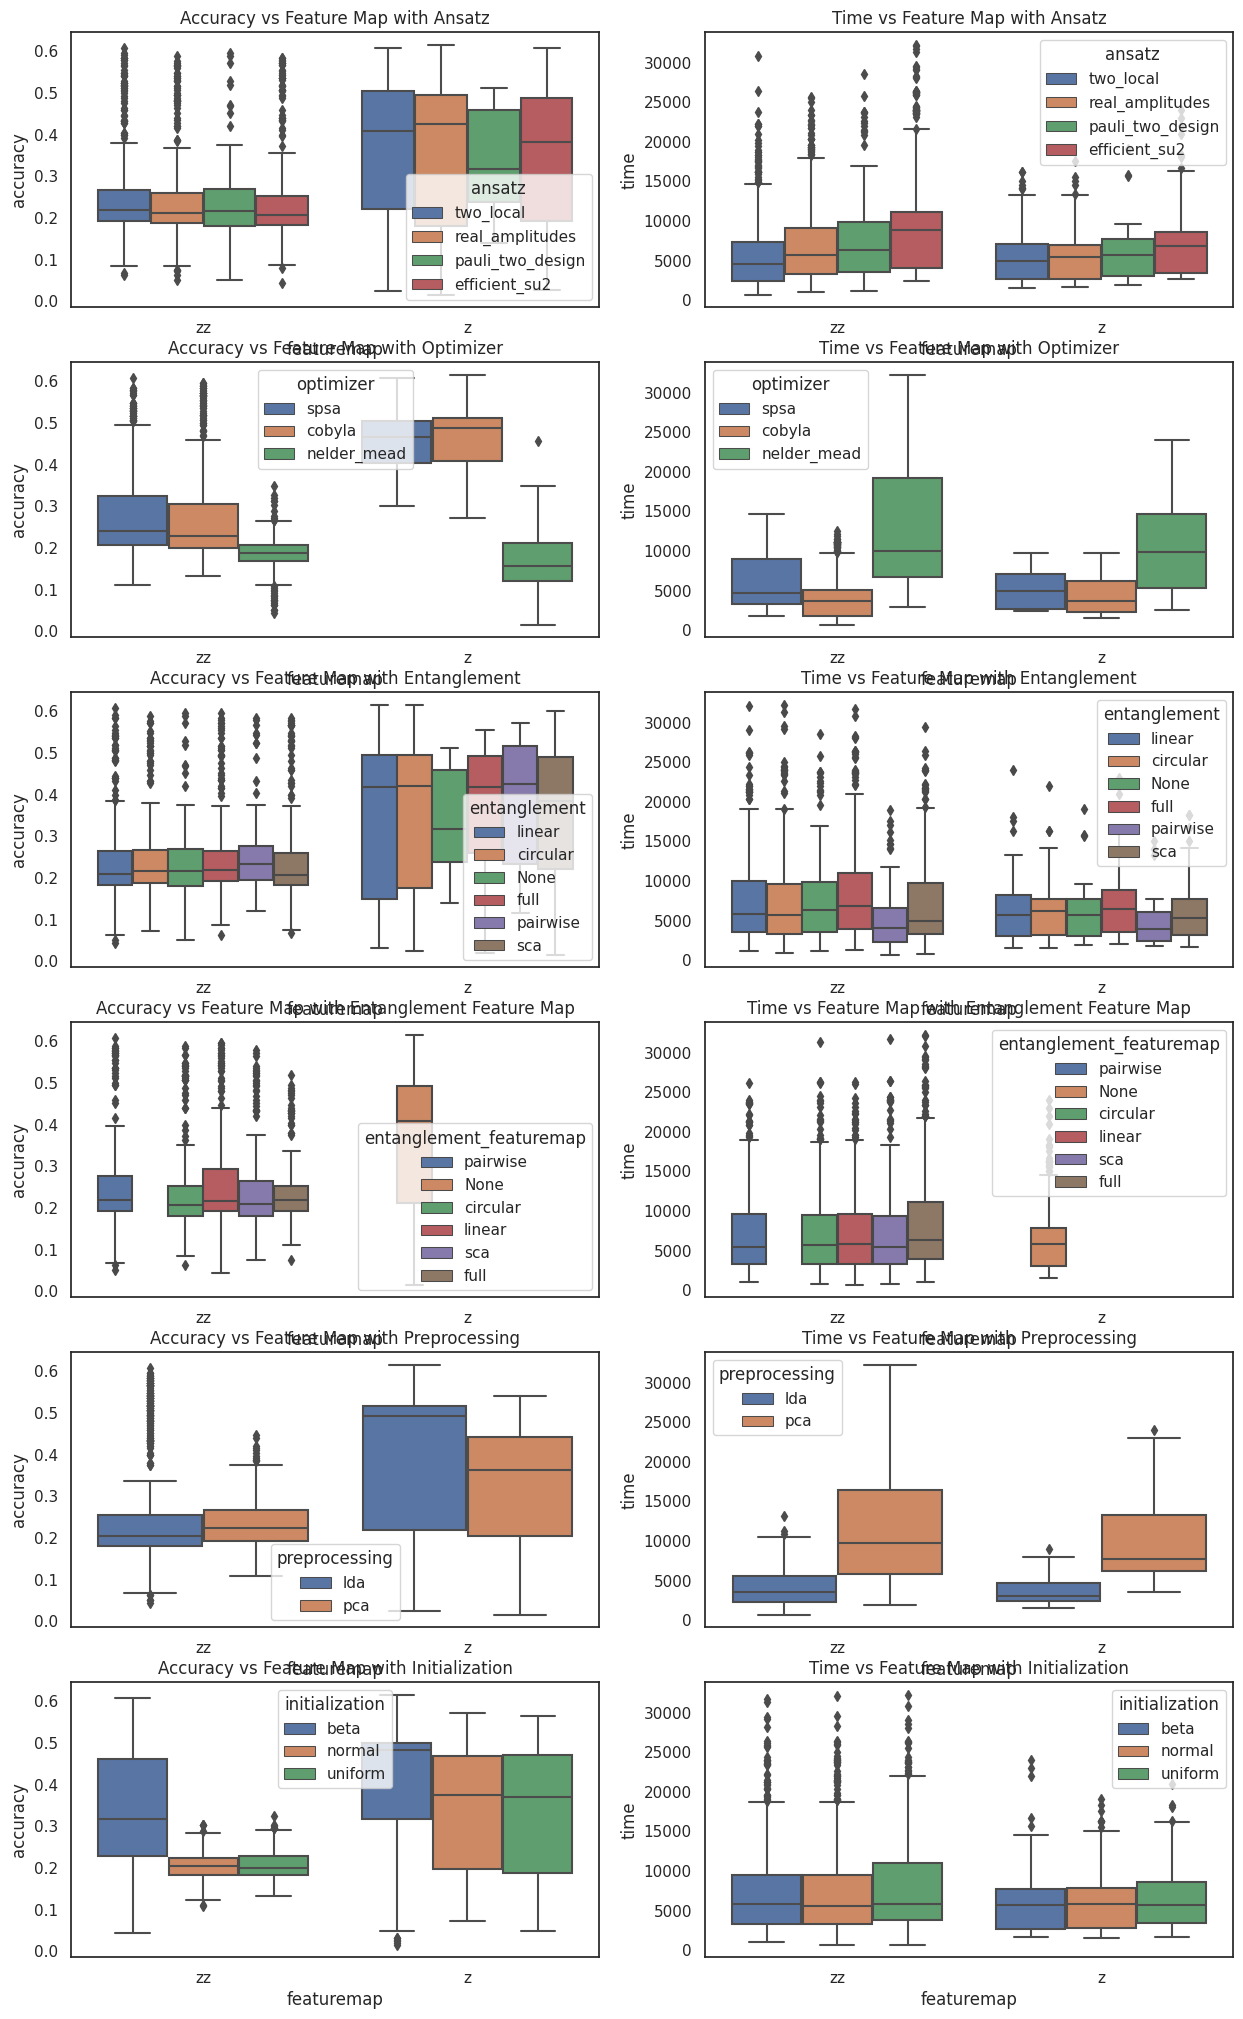

In [92]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

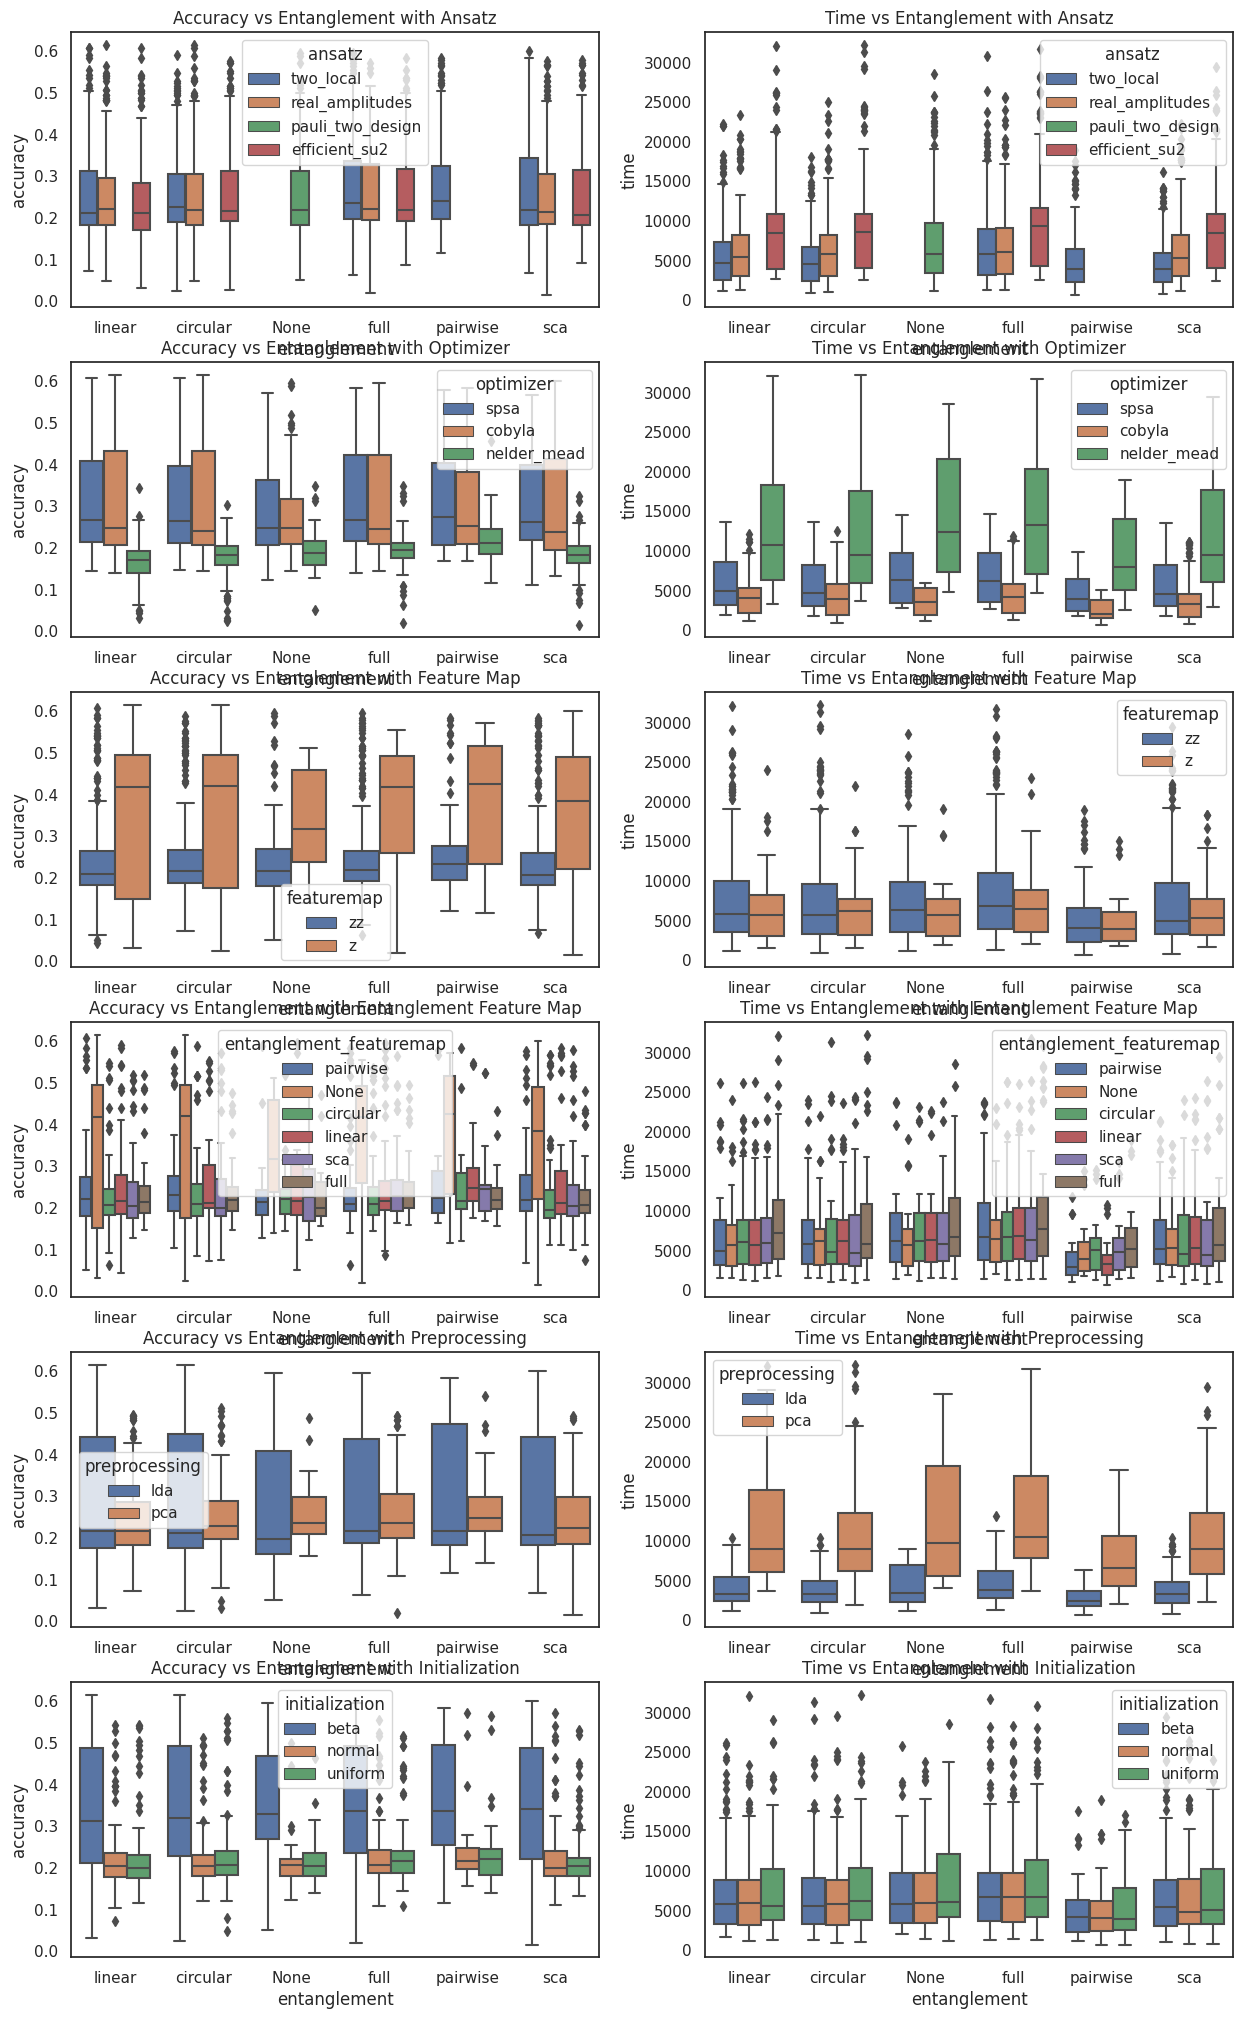

In [93]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

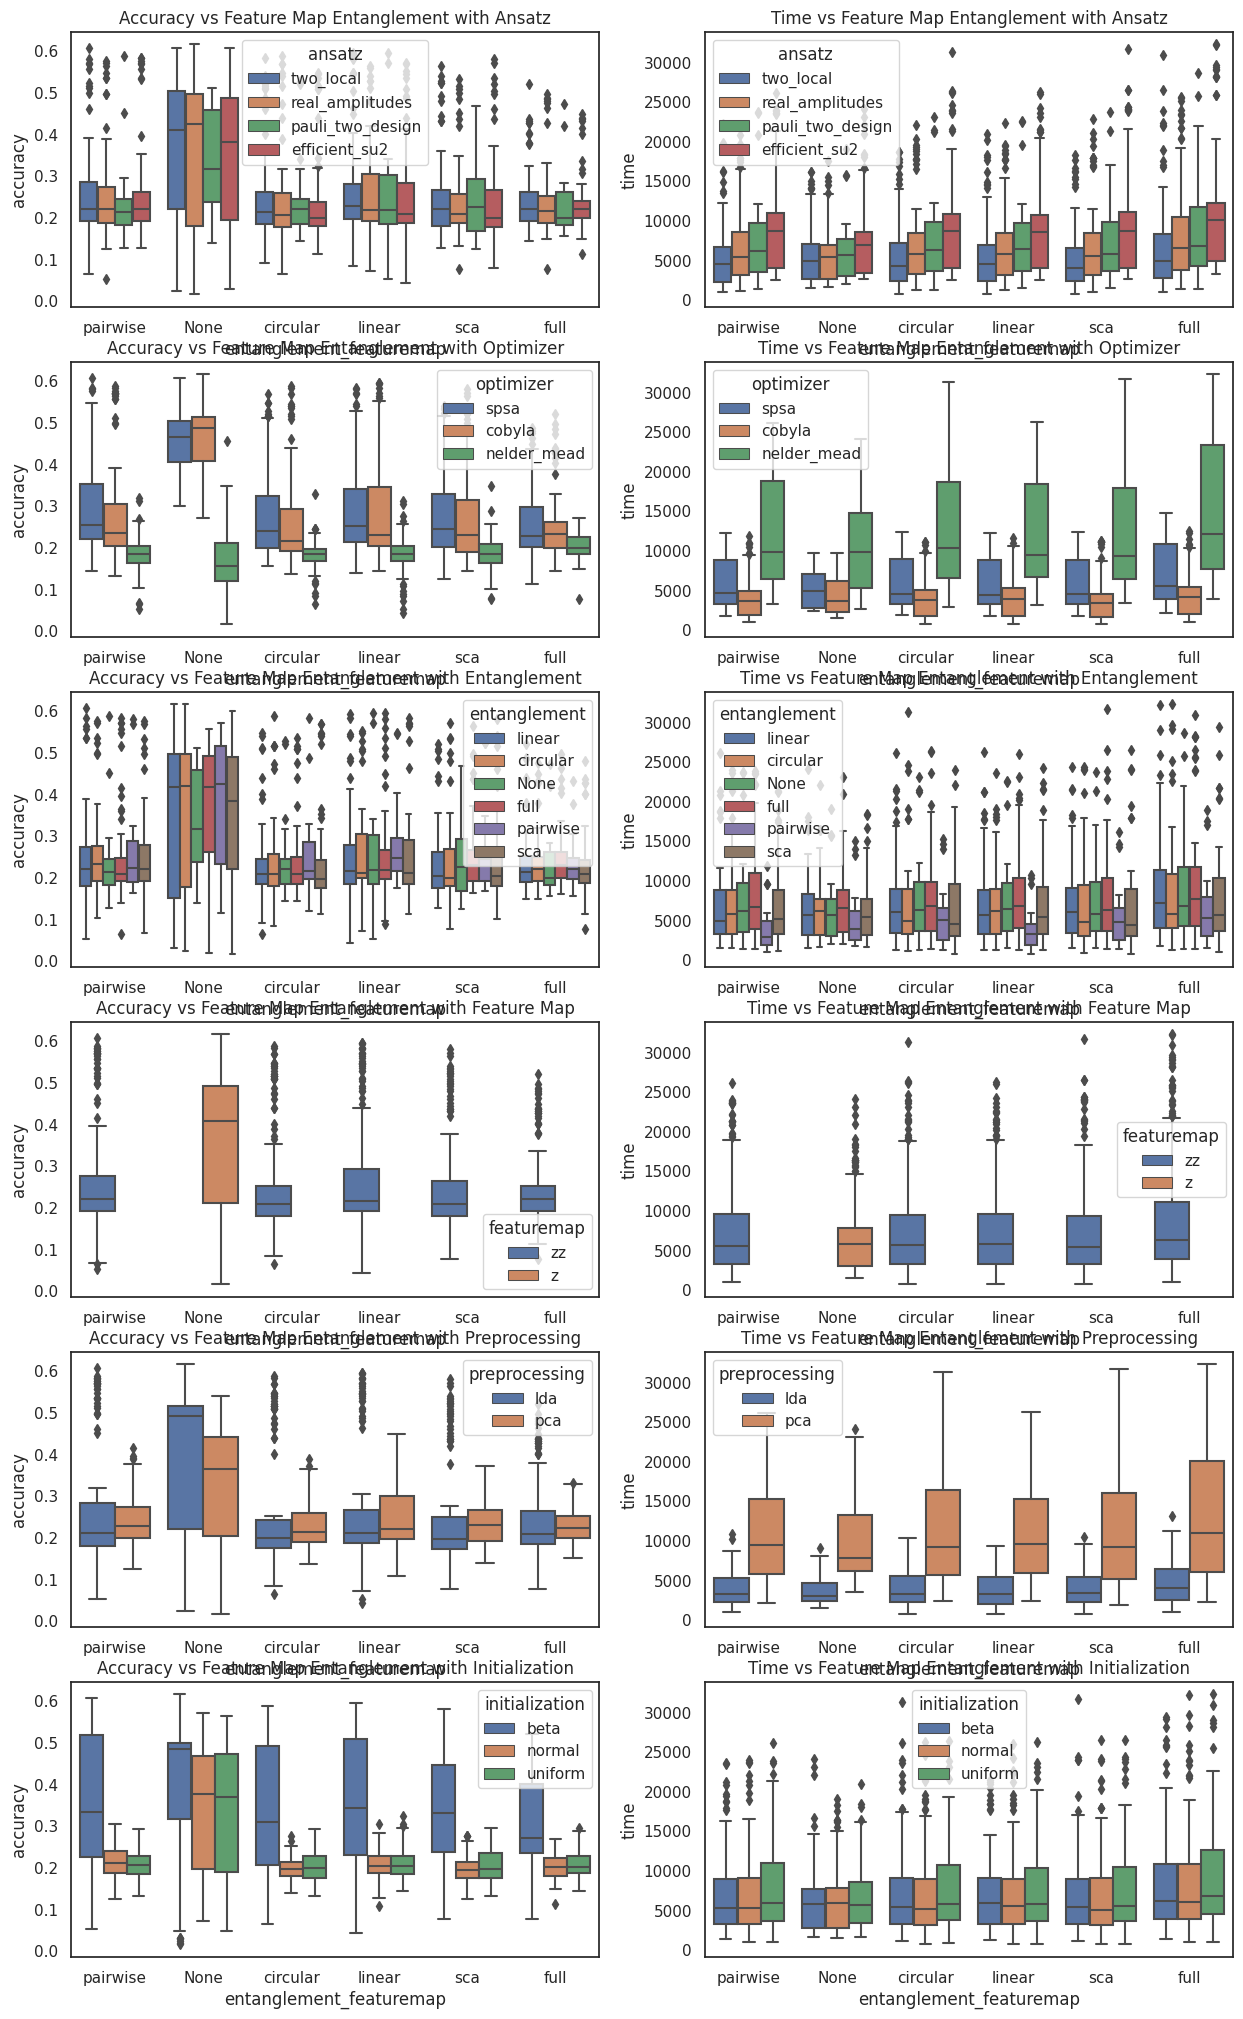

In [94]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

## Analyze Worst
* Only Nelson-Mead and (few) SPSA configurations
* A lot of ZFeatureMap, compared to ZZ
* More LDA than PCA ones

In [95]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla              NaN
nelder_mead    0.073413
spsa           0.001984
Name: accuracy, dtype: float64

In [96]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2       0.027778
pauli_two_design    0.009259
real_amplitudes     0.034722
two_local           0.018519
Name: accuracy, dtype: float64

In [97]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.067460
zz    0.016667
Name: accuracy, dtype: float64

In [98]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular    0.037037
full        0.018519
linear      0.033951
pairwise         NaN
sca         0.024691
Name: accuracy, dtype: float64

In [99]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular        0.027778
                 full            0.009259
                 linear          0.037037
                 sca             0.037037
real_amplitudes  circular        0.046296
                 full            0.027778
                 linear          0.046296
                 sca             0.018519
two_local        circular        0.037037
                 full            0.018519
                 linear          0.018519
                 pairwise             NaN
                 sca             0.018519
Name: accuracy, dtype: float64

In [100]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular    0.015873
full        0.007937
linear      0.031746
pairwise    0.015873
sca         0.011905
Name: accuracy, dtype: float64

In [101]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
lda    0.034392
pca    0.015873
Name: accuracy, dtype: float64

In [102]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.059524
normal     0.009921
uniform    0.005952
Name: accuracy, dtype: float64

# Plot

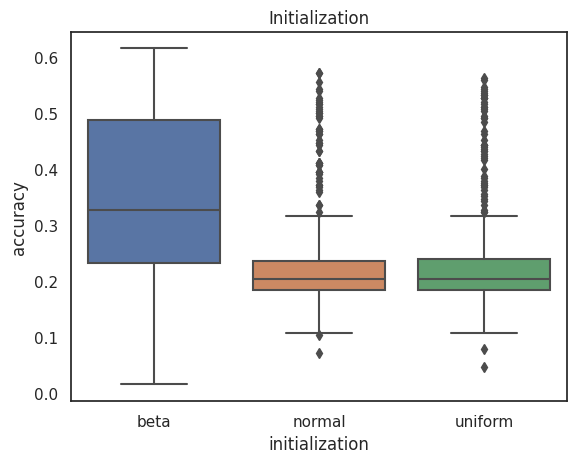

In [103]:
sns.boxplot(data=res, x='initialization', y='accuracy', palette='deep')
plt.title('Initialization')
# plt.savefig("../reports/figures/covtype_init.png", bbox_inches='tight')
plt.show()

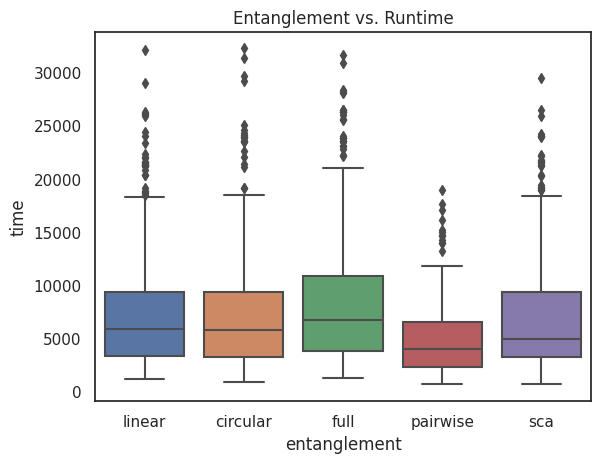

In [104]:
sns.boxplot(data=res, x='entanglement', y='time', palette='deep')
plt.title("Entanglement vs. Runtime")
# plt.savefig("../reports/figures/covtype_entanglement_time.png", bbox_inches='tight')
plt.show()

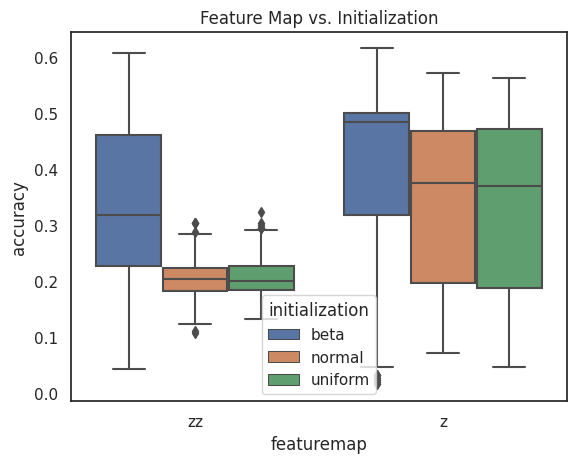

In [105]:
sns.boxplot(data=res, x='featuremap', y='accuracy', hue='initialization', palette='deep')
plt.title("Feature Map vs. Initialization")
# plt.savefig("../reports/figures/covtype_featuremap_init.png", bbox_inches='tight')
plt.show()

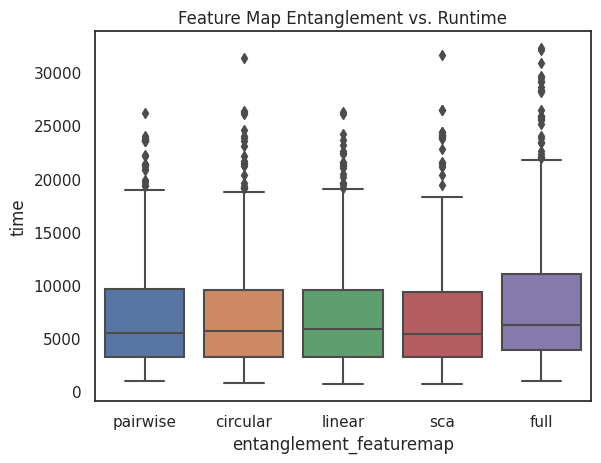

In [106]:
sns.boxplot(data=res, x='entanglement_featuremap', y='time', palette='deep')
plt.title("Feature Map Entanglement vs. Runtime")
# plt.savefig("../reports/figures/covtype_featuremap_ent_runtime.png", bbox_inches='tight')
plt.show()